# Exercício 4 - Modelo de Ising

O modelo de Ising é o modelo mais simples e mais estudado em Mecânica Estatística, Teoria de Campos e outras áreas, servido de ponto de partida para o estudo de problemas de transição de fase ou outras características de comportamento macroscópico.

Neste exercício, vamos estudar algumas das características do Modelo de Ising em 2 dimensões, usando Python, Numpy e Matplotlib para nos ajudar. Mas antes, vejamos o que é o Modelo de Ising e como podemos usar um programa para estudá-lo.

## O Modelo de Ising

Não cabe aqui a descrição da relevância do modelo de Ising, então fica a seu cargo estudar a respeito. Referências não faltam, mas uma em português e bem escrita é o livro de Mecânica Estatística do prof. Salinas.

Para nós, o que precisamos saber é que o modelo de Ising é composto por uma rede quadrada, com $L \times L$ nós. Cada nó é representado pela sua posição na rede $(i,j)$ e tem uma varíavel binária $\sigma_{ij} \in [-1,1]$ chamada *spin*. A *vizinhaça* do $n(i,j)$ nó $(i,j)$ são os quatro nós que formam uma cruz centrada em $(i,j)$ mais ele próprio, ou seja $n(i,j) = \{(i,j),(i-1,j),(i+1,j),(i,j-1),(i,j+1)\}$. É comum usarmos *condições periódicas de contorno* para que o nós das bordas tenham o mesmo número de vizinhos dos nós no miolo da rede (o que ajuda a controlar os efeitos de tamanho finito, importantes no estudo de transições de fase).
Podemos visualizar uma realização do modelo da como um tabuleiro de xadrex com $L\times L$ casas em que algumas delas foram pintadas cor contrária aleatóriamente:

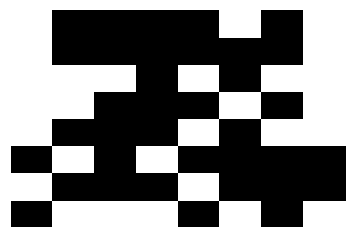

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

rand = np.random.rand
choice = np.random.choice

%matplotlib inline

def plot_ising_spins(lattice, ax=None, *,cmap='binary',**kwargs):
    if ax is None:
        ax = plt.gca()
    img = ax.pcolormesh(lattice,**{'cmap':cmap,**kwargs})
    ax.set_xticks([])
    ax.set_yticks([])
    for (_,s) in ax.spines.items():
        s.set_visible(False)
    return img


plot_ising_spins(choice([-1,1],(8,8)))

A coisa fica interessante quando definimos um Hamiltoniano para gerar uma dinâmica para os spins.
Suponhamos que seja energéticamente mais custoso para um certo nó ter o spin contrário a um dos vizinho do que ter o mesmo spin. Isto é pode ser incorporado na dinâmica fazendo o Hamiltoniano ter um termo do tipo $-\sigma_{ij}\sigma_{i+1j}$, por exemplo.
Se fizermos isso para todos os spins teremos
$$
H(\{\sigma\}) = -\sum_{\{ a,b\}}\sigma_a\sigma_b
$$
onde $\{\sigma\}$ é o conjunto de todos os spins, chamado *estado* do sistema, $a$ e $b$ são nós distintos vizinhos e $\{a,b\}$ é o conjunto de todos os nós distintos vizinhos.

Como o Hamitoniano força que spins tenham o mesmo valor, seria justo esperar que depois de um certo tempo, a estado do sistema seja com todos os spins $1$ ou todos $-1$, o que é verdade quando o sistema está em temperatura baixa (abaixo da temperatura crítica). Porém, quando há temperatura alta o bastante (acima da crítica) o sistema não consegue atingir o equilíbrio, e o spins ficam trocando de estado quase aletoriamente, mantendo o aspecto de tabuleiro de xadrez bagunçado.
Há, portanto, um intermédio entre valores altos e baixo de temperatura no qual os estados não estão nem em um nem no outro desses extremos. Existem uma temperactura crítica $T_c$ para a qual valores próximos mudam as propriedades físicas do sistema.

Nosso objetivo é estudar algumas dessas propriedades, como a temperatura crítica, e para isso precisamos simular esses sistema. Isso demanda que possamos lidar com a aleatoriadade introduzida na dinâmica pela temperatura e portanto temos que escolher um modelo probabilistico.

## A distribuição de Boltzmann

A Teoria de Probabilidades é um tópico antigo e com diferentes abordágens. Embora eu tenha citado o livro do prof. Salinas, a abordagem probabilistica que uso é um pouco mais moderna e pode ser vista em trabalhos do prof. Nestor Caticha e prof. Ariel Caticha entre outros.
Para este exercício, basta dizer que *escolher* um modelo probabilístico implica em especificar quais são as funções relevantes para o problema em mãos, identificar uma distribuição à priori para o problema e usar o método de Máxima Entropia, restrito pela informação dada pelas funções relevantes, para determinar qual a distribuição de probabilidades adequada para estudar o problema.
Note que a distribuição adequada será condicionada na informação que eu tenho a priori e, portanto, será tão mais adequada conforme tal informação seja de mais qualidade.

Dito isso, para o problema do modelo de Ising estamos interessados na distribuição de estados dos sistema, isto é precisamos de uma distribução de probabilidades $P(\{\sigma\})$. A única função relevante dos estados até agora é o Hamiltoniano $H$ e, para usar o método MaxEnt, precisamos associar um parâmetro de Lagrange $\beta = \frac{1}{T}$, convenientemente escrito como o inverso da temperatura. Se partirmos de uma priori uniforme nos estados, então a distribuição de estados será a distribuição de Boltzmann:
$$
P(\{\sigma\}) = \frac{1}{Z}\exp(-\beta H(\{\sigma\}))
$$

Então, para estudar a dinâmica, podemos usar o algoritmo de Metrópolis:
  1. escolha um nó $(i,j)$ aleatorimente
  2. calcule a diferença de energia $\Delta E$ caso o $\sigma_{ij}$ fosse invertido: $\sigma_{ij} \rightarrow -\sigma_{ij}$ 
  3. se $\Delta E \le 0$ inverta o spin, caso $\Delta E > 0$, inverta o spin com probabilidade $\exp(-\beta\Delta E)$

O algoritmo de Metrópolis é um tipo de algoritmo de Monte Carlo e permite realizar simulações do sistema para poder tirar amostras de uma distribuição para a qual não podemos escrever a distribuição de forma fechada.

## O que você deve fazer?

O seu trabalho é estudar a magnetização $m = \frac{1}{L^2}\sum_a \sigma_a$ e a capacidade térmica $C = \frac{\beta^2}{L^2}\langle H^2\rangle - \langle H\rangle^2$, determinando a temperatura de transição e os expoentes críticos:
$$
m = m_0\left(1 - \frac{T}{T_c}\right)^{\beta}
$$
    and
$$
C = C_{fundo} + C_0\left(1 - \frac{T}{T_c}\right)^{-\alpha}
$$
Use as Python, Numpy e Matplotlib e, se possível, faça 3 animações, uma para uma temperatura abaixo da crítica, outra para uma temperatura próxima da crítica e uma acima.
Faça gráficos do da magnetização e da distância de correlação, faça repetições da simulação para poder ajustar o valor da temperatura crítica.

In [2]:
import numpy as np

Representação dos estados do sistema

In [3]:
L = 8
S = np.random.choice([-1,1],(L,L))
S

array([[ 1,  1, -1,  1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1,  1,  1,  1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [ 1,  1,  1,  1, -1,  1,  1,  1],
       [-1,  1,  1, -1,  1, -1,  1,  1],
       [ 1, -1,  1, -1,  1,  1,  1,  1],
       [-1, -1,  1,  1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  1, -1, -1,  1]])

como, dado $(i,j)$, você encontra os vizinhos dele?

In [4]:
(i,j) = 7,0
I,J = [i-1,(i+1)%L,i,i],[j,j,j-1,(j+1)%L]
S[I,J], list(zip(I,J))

(array([-1,  1,  1,  1]), [(6, 0), (0, 0), (7, -1), (7, 1)])

escreva função que calcula diferença de energia quando se troca o spin $(i,j)$

$$ E_{ij;0} = -\sigma_{ij}(\sum_{a\in n(i,j)}\sigma_a) $$
$$ E_{ij;0} = -(-\sigma_{ij})(\sum_{a\in n(i,j)}\sigma_a)  =  E_{ij;0} = \sigma_{ij}(\sum_{a\in n(i,j)}\sigma_a) $$

$$ \Delta E = 2\sigma_{ij}*(...)$$

In [5]:
def delta_E(lattice,i,j):
    I,J = [i-1,(i+1)%L,i,i],[j,j,j-1,(j+1)%L]
    dE = 2*lattice[i,j]*(lattice[I,J].sum())
    return dE

In [6]:
delta_E(S,i,j) # 4

4

In [7]:
np.random.rand, np.exp

(<function RandomState.rand>, <ufunc 'exp'>)

invertendo o spin

In [8]:
def talvez_inverte_spin(lattice,beta):
    i,j = np.random.choice(lattice.shape[0],2)
    dE = delta_E(lattice,i,j)
    if dE <= 0 or np.random.rand() < np.exp(-beta*dE):
        lattice[i,j] *= -1

escolhendo um nó aleatório

In [9]:
np.random.choice(L,2)

array([7, 5])

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
S = np.random.choice([-1,1],(L,L))

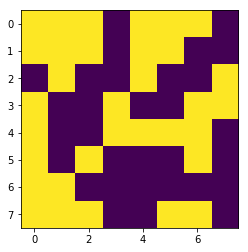

In [12]:
plt.imshow(S)

In [13]:
queimo = 20
periodo_medida = 8
m = []
C = []
for t in range(1000):
    talvez_inverte_spin(S,10.0)
    if t > queimo:
        if (t-qeuimo)%periodo == 0:
            # faço a medida
            # m.append(...)
            # C.append(...)

SyntaxError: unexpected EOF while parsing (<ipython-input-13-4072b5f0293b>, line 11)

In [ ]:
plt.imshow(S)

In [ ]:
m = S.mean()
m

In [ ]:
E = np.array([-delta_E(S,i,j)/10 for i in range(L) for j in range(L)]).reshape((L,L))

In [ ]:
E.var()*beta**2

In [ ]:
def simula(beta,L,*,T,periodo_medida,queima):
    S0 = np.random.choice([-1,1],(L,L))
    S = S0.copy()
    m, C = [], []
    for t in range(T):
        talvez_inverte_spin(S,beta)
        if t > queima and (t-queima)%periodo_medida == 0:
            m.append(S.mean())
            E = beta*beta*np.array([-delta_E(S,i,j)/10 for i in range(L) 
                                    for j in range(L)]).var()
            C.append(E)
    return S0,S,m,C

In [ ]:
S0,S,m,C = simula(10.0, 8, T=1000, queima=20, periodo_medida=8)

In [ ]:
plt.imshow(S0)

In [ ]:
plt.imshow(S)

In [ ]:
plt.hist(m)

In [ ]:
m_medio = np.mean(m)
m_medio

In [ ]:
plt.hist(C)

In [ ]:
C_medio = np.mean(C)
C_medio

In [ ]:
L = 16
betas = np.linspace(0.1,5.1,50)
m_beta, C_beta = [], []
for beta in betas:
    _,_,m,C = simula(beta,L,T=(L**2)*50,queima=(L**2)*30,periodo_medida=L**2)
    m_beta.append(abs(np.mean(m)))
    C_beta.append(np.mean(C))

In [ ]:
plt.plot(betas,m_beta)

In [17]:
%matplotlib qt

def init():
    ax.set_xticks([])
    ax.set_yticks([])
    for (_,s) in ax.spines.items():
        s.set_visible(False)
    ax.set_title(r'$\beta = $' + f'{beta}')
    return img,

def update(t):
    f = talvez_inverte_spin(S,beta)
    img.changed()
    return img

S = np.random.choice([-1,1],(16,16))
beta = 2
fig, ax = plt.subplots()
img = plot_ising_spins(S,ax=ax,cmap='viridis',animated=True)
anim = FuncAnimation(fig, update,interval=1,init_func=init, blit=True)